Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».

## Загрузка данных

In [2]:
pip install phik -q

Note: you may need to restart the kernel to use updated packages.


In [3]:
# библиотеки для работы с данными
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import phik
import numpy as np 
# библиотеки для работы с мо.
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# метрики
from sklearn.metrics import (r2_score, 
                             mean_absolute_error, 
                             mean_squared_error,
                             accuracy_score,
                             recall_score,
                             precision_score,
                             confusion_matrix)
import scipy.stats as st 
import statsmodels.stats.api as sms
import numpy as np, scipy.stats as st
import scipy.stats
import warnings

In [4]:
# загрузим данные
data_main = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal=',')
data_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
data_cb = pd.read_csv('/datasets/cow_buy.csv', sep=';',decimal=',')


Просмотрим на данные.

In [5]:
data_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [6]:
data_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

In [7]:
data_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [8]:
data_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [9]:
data_cb.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [10]:
data_cb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


Посмотрим на общую информацию

Пропусков на первый взгляд не заметно. Но пока займемся названиями столбцов.

In [11]:
#  приведем имена столбцов к стандарту.
data_main = data_main.rename(columns=
                {'Удой, кг':'удой_кг', 'ЭКЕ (Энергетическая кормовая единица)':'эке','Сырой протеин, г':'сырой_протеин',
                'СПО (Сахаро-протеиновое соотношение)':'спо','Тип пастбища':'тип_пастбища',
                'порода папы_быка':'порода_папы_быка','Жирность,%':'жирность_%','Белок,%':'белок_%','Вкус молока':'вкус_молока'})
data_main.columns = map(str.lower, data_main.columns)


In [12]:
data_main.sample()

,id,удой_кг,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст
159,160,6262,14.4,1666,0.93,Вис Бик Айдиал,Равнинное,Айдиал,3.59,3.075,вкусно,более_2_лет


In [13]:
data_dad = data_dad.rename(columns={'Имя Папы':'имя_папы'})
data_dad.sample()

,id,имя_папы
58,59,Буйный


In [14]:
data_cb.columns = map(str.lower, data_cb.columns)
data_cb = data_cb.rename(columns={'тип пастбища':'тип_пастбища','порода папы_быка':'порода_папы_быка',
                                  'текущая_жирность,%':'текущая_жирность_%','текущий_уровень_белок,%':'текущий_белок_%'})

In [15]:
data_cb.sample()

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_белок_%,возраст
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет


**Вывод**  Загрузили и просмотрели   три таблицы. Изменили названия столбцов.


##  Предобработка данных

In [16]:
#  поиск пропусков.
datalist =[data_main, data_dad, data_cb]
for i in datalist:
    print(i.isna().sum())
    print()


id                  0
удой_кг             0
эке                 0
сырой_протеин       0
спо                 0
порода              0
тип_пастбища        0
порода_папы_быка    0
жирность_%          0
белок_%             0
вкус_молока         0
возраст             0
dtype: int64

id          0
имя_папы    0
dtype: int64

порода                0
тип_пастбища          0
порода_папы_быка      0
имя_папы              0
текущая_жирность_%    0
текущий_белок_%       0
возраст               0
dtype: int64



Пропусков нет

In [17]:
#  поиск дубликатов
print(data_main.duplicated().sum())
print(data_dad.duplicated().sum())
print(data_cb.duplicated().sum())

5
0
4


Как видим есть полные дубликаты в двух таблицах. Удалим их

In [18]:
# удалим дубликаты и посмотрим результат
data_main = data_main.drop_duplicates()
data_cb = data_cb.drop_duplicates()

Обработаем не явные дубликаты

In [19]:
def dubli(df, col_name,error, result):
    df.loc[df[col_name]==error,col_name]=result
    warnings.filterwarnings('ignore')
    
    return df

In [20]:
data_main['тип_пастбища'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [21]:
pd.options.mode.chained_assignment = None
data_main = dubli(data_main, 'тип_пастбища','Равнинные','Равнинное')
data_main['тип_пастбища'].unique()

array(['Равнинное', 'Холмистое'], dtype=object)

In [22]:
data_main['порода_папы_быка'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [23]:
data_main = dubli(data_main, 'порода_папы_быка','Айдиалл','Айдиал')
data_main['порода_папы_быка'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [24]:
# Изменим данные, что они начинались с Заглавной буквы
data_cb['тип_пастбища'] = data_cb['тип_пастбища'].str.title()

Изменим тип данных некоторых стобцов

In [25]:
def replace(df, columns:list):
    for i in columns:
        df[i] = df[i].astype(float)
    return df    

In [26]:
data_main = replace(data_main, ['эке','спо','жирность_%','белок_%'])
data_main.head()

,id,удой_кг,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


In [27]:
data_cb = replace(data_cb,['текущая_жирность_%','текущий_белок_%'])
data_cb.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_белок_%,возраст
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


**Вывод** Обработали данные. Удалили дубликаты, Изменили тип некоторых столбцов. Пропусков нет.

## Исследовательский анализ данных

In [28]:
def pie(df,title):
    colors = sns.cubehelix_palette(start=.5, rot=-.75)
    df.plot(kind='pie',autopct='%1.1f%%',
                                      figsize=(5,5),colors=colors,
                                      title = title);
    plt.show()

In [29]:
def boxplot(data, x, title):
    sns.boxplot(data=data, x=x,palette="crest");
    plt.title(title)
    plt.show()

In [30]:
def boxhist(data, x, title):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.boxplot(ax=axes[0],data=data, x=x,palette="crest");
    axes[0].set_xlabel(title)
    axes[0].set_title(title)


    sns.histplot(ax=axes[1],data=data, x=x, kde=True, palette="crest");
    axes[1].set_title(title);
    axes[1].set_xlabel(title)
    axes[1].axvline(data[x].mean(), c='k', ls='-', lw=2.5)
    axes[1].axvline(data[x].median(), c='orange', ls='--', lw=2.5)
    plt.xlabel(title);
    plt.show()

#### Исследование категориальных признаков data_main

In [31]:
# рапределение коров по вкус молока
data_main['вкус_молока'].value_counts()

вкусно       371
не вкусно    258
Name: вкус_молока, dtype: int64

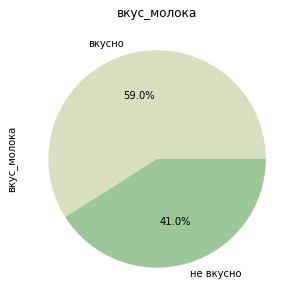

In [32]:
pie(data_main['вкус_молока'].value_counts(),'вкус_молока');

По мнению фермера вкусное молоко имеют 59% коров.

Применим для всех категориальных признаков


----- порода -----
Вис Бик Айдиал     373
РефлешнСоверинг    256
Name: порода, dtype: int64



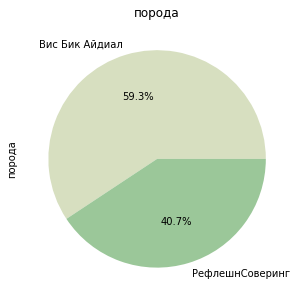

----- тип_пастбища -----
Холмистое    351
Равнинное    278
Name: тип_пастбища, dtype: int64



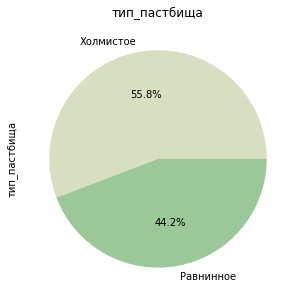

----- порода_папы_быка -----
Айдиал     318
Соверин    311
Name: порода_папы_быка, dtype: int64



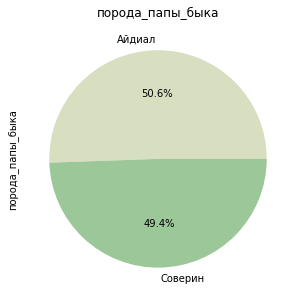

----- возраст -----
более_2_лет    519
менее_2_лет    110
Name: возраст, dtype: int64



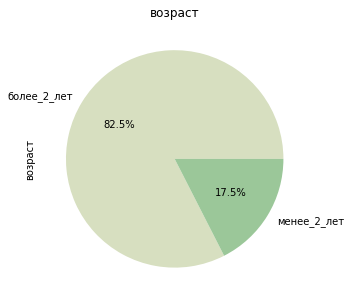

In [33]:
categ_names=['порода','тип_пастбища', 'порода_папы_быка','возраст']
for i in categ_names:
    print('-----',i,'-----')
    print(data_main[i].value_counts())
    print()
    pie(data_main[i].value_counts(), i);

Из графиков можно сделать выводы:
- Больше всего коров породы Вис Бик Айдиал -372, или 59,2%.
- Большинство коров пасутся на пасбище 350 , или 57,7%
- порода_папы_быка разпределены равномерно
- Коровам которым менее 2 лет всего 110, или 17,5%

#### Исследование количественных признаков data_main

In [34]:
data_main['удой_кг'].describe()

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: удой_кг, dtype: float64

Как видим в стобце с удоем есть выброс.

In [35]:
# Посмотрим на все аномальные значения
data_main.loc[data_main['удой_кг']> 8000]

,id,удой_кг,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,Холмистое,Айдиал,3.22,3.076,вкусно,более_2_лет


In [36]:
data_main = data_main.drop(16)
data_main.loc[data_main['удой_кг']> 8000]

,id,удой_кг,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст


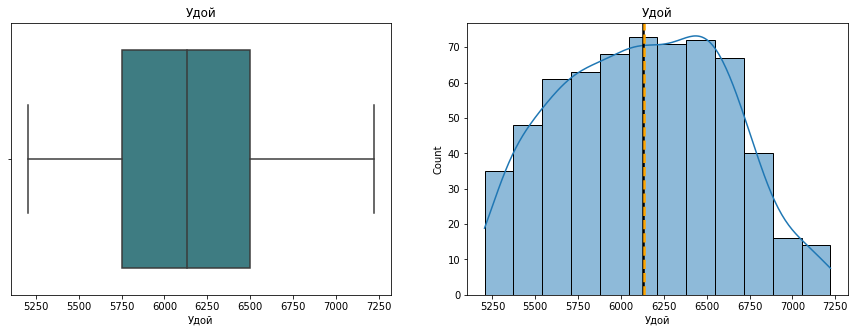

In [37]:
boxhist(data=data_main, x='удой_кг', title='Удой')

Как видо по графику большинство коров имеют удой около 6100 кг в год. Выбросов нет. Нормальное распредление.

Сделаем также для других количественных признаков признаков

------ эке ---------
count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: эке, dtype: float64



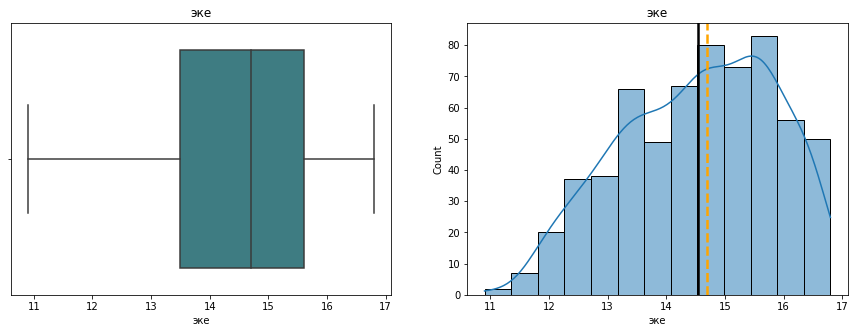

------ сырой_протеин ---------
count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: сырой_протеин, dtype: float64



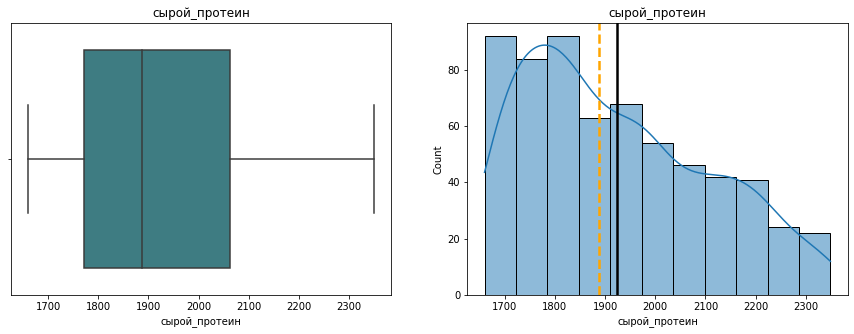

------ спо ---------
count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: спо, dtype: float64



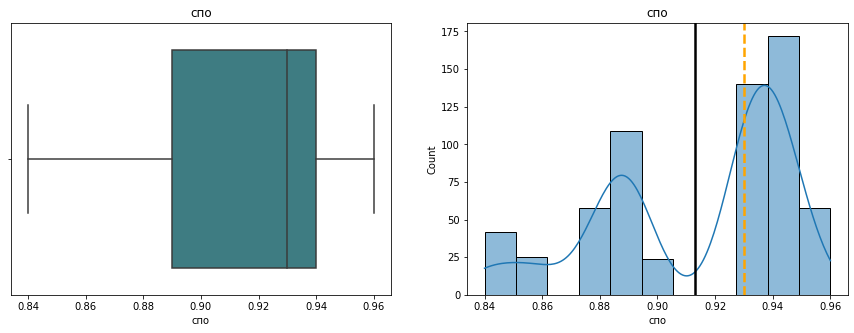

------ жирность_% ---------
count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: жирность_%, dtype: float64



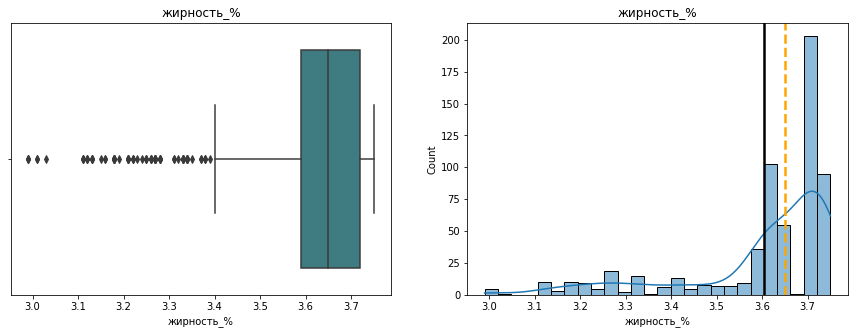

------ белок_% ---------
count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: белок_%, dtype: float64



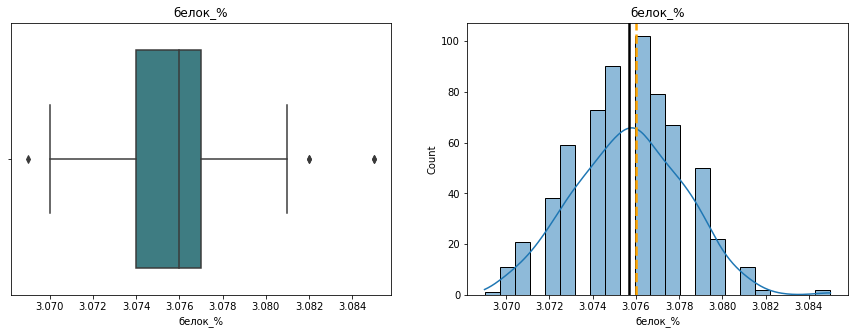

In [38]:
col_names = ['эке', 'сырой_протеин','спо','жирность_%','белок_%']
for i in col_names:
    print('------',i,'---------')
    print(data_main[i].describe())
    print()
    boxhist(data=data_main, x=i, title=i);

Как видно из графиков:
- ЭКЕ((Энергетическая кормовая единица) - имеет среднее значение в 14.5. Выбросов нет.
  Распределение с отклоненем вправо
- Сырой протеин в корме имеет среднее значение в 1923 граммаю Выбросов нет.Распределение с отклоненем влево
- СПО (Сахаро-протеиновое соотношение)  средене значение в 0,91. Выбросы отсутствуют. Не нормальное распределение
- Процент Жирности(молока)  в среденем 3.6% .Есть выбросы.  не нармально распределение с отклоненем вправо
- Процент белка в среднем 3,07% есть выбросы. Номальное расредление отклоненем вправо.

In [39]:
data_main.loc[data_main['жирность_%']< 3.4,'жирность_%'] = 3.4

#### Исследование категориальных признаков data_dad

In [40]:
data_dad['имя_папы'].value_counts()

Барин       240
Буйный      215
Соловчик    110
Геркулес     64
Name: имя_папы, dtype: int64

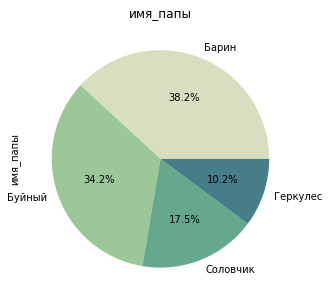

In [41]:
pie(data_dad['имя_папы'].value_counts(),'имя_папы');

Больше всего потомства имеет бык Барин -240 коров, или 38,2% от общего числа коров.
Меньше всего коров от Геркулеса -64, или 10,2%

#### Исследование категориальных признаков data_cb

----- порода -----
РефлешнСоверинг    8
Вис Бик Айдиал     8
Name: порода, dtype: int64



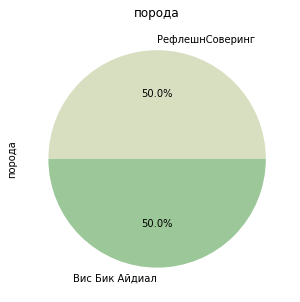

----- тип_пастбища -----
Холмистое    8
Равнинное    8
Name: тип_пастбища, dtype: int64



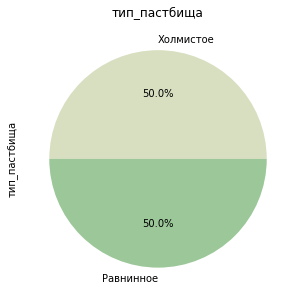

----- порода_папы_быка -----
Соверин    10
Айдиал      6
Name: порода_папы_быка, dtype: int64



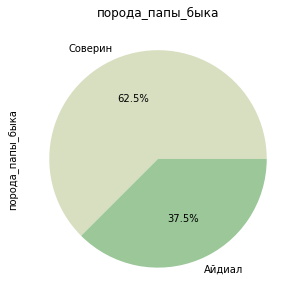

----- имя_папы -----
Буйный      7
Геркулес    5
Соловчик    2
Барин       2
Name: имя_папы, dtype: int64



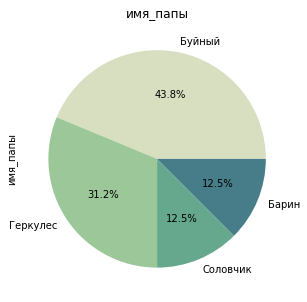

----- возраст -----
более_2_лет    11
менее_2_лет     5
Name: возраст, dtype: int64



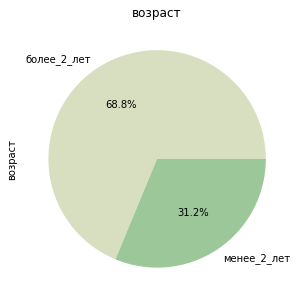

In [42]:
cb_categ_name = ['порода','тип_пастбища','порода_папы_быка','имя_папы', 'возраст']
for i in cb_categ_name:
    print('-----',i,'-----')
    print(data_cb[i].value_counts())
    print()
    pie(data_cb[i].value_counts(), i);   

- Порода коров и тип пасбища рапределены одинаково
- Порода папы быка приобладает Соверин-10 или 62,5% от общего числа
- Больше всего потомства от Буйного-7, или 43,8%.
- Меньше всего потомства от Соловчика и Барина - по 2 коровы или 12,5% каждый
- Преобладают коровы возростом более 2 лет - 68,8%

#### Исследование количиственных признаков data_cb

------ текущая_жирность_% ---------
count    16.000000
mean      3.571875
std       0.141620
min       3.340000
25%       3.415000
50%       3.585000
75%       3.692500
max       3.770000
Name: текущая_жирность_%, dtype: float64



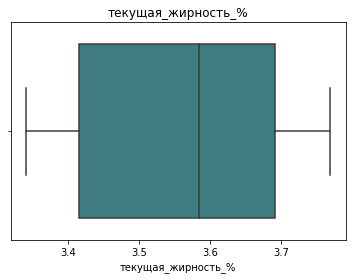

------ текущий_белок_% ---------
count    16.000000
mean      3.068250
std       0.011264
min       3.046000
25%       3.059500
50%       3.073500
75%       3.076750
max       3.081000
Name: текущий_белок_%, dtype: float64



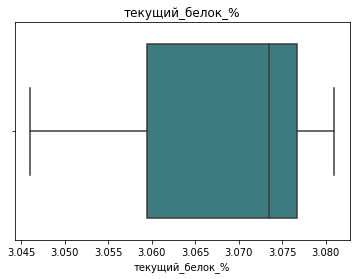

In [43]:
cb_col_names = ['текущая_жирность_%','текущий_белок_%']
for i in cb_col_names:
    print('------',i,'---------')
    print(data_cb[i].describe())
    print()
    boxplot(data=data_cb, x=i, title=i);

Текущая жирность в среднем 3,5%

Белок в среднем 3,06%

Выбросов нет.

**Вывод** Провели статистический анализ Ктегориальных и количественных признаков

## Корреляционный анализ

In [44]:
cf = data_main.phik_matrix() 
cf.style.background_gradient(cmap='Blues')

interval columns not set, guessing: ['id', 'удой_кг', 'эке', 'сырой_протеин', 'спо', 'жирность_%', 'белок_%']


,id,удой_кг,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст
id,1.000000,0.000000,0.000000,0.108271,0.382303,0.611843,0.037776,0.320977,0.629816,0.000000,0.039659,0.000000
удой_кг,0.000000,1.000000,0.719239,0.465118,0.661615,0.161643,0.279645,0.518114,0.725682,0.063045,0.178281,0.998071
эке,0.000000,0.719239,1.000000,0.458283,0.591190,0.123086,0.106758,0.171355,0.711256,0.000000,0.272265,0.771596
сырой_протеин,0.108271,0.465118,0.458283,1.000000,0.386550,0.090971,0.097165,0.000000,0.428083,0.202386,0.173817,0.353829
спо,0.382303,0.661615,0.591190,0.386550,1.000000,0.062660,0.155349,0.425601,0.577572,0.073787,0.572702,0.744410
порода,0.611843,0.161643,0.123086,0.090971,0.062660,1.000000,0.213218,0.089330,0.289409,0.361851,0.000000,0.057295
тип_пастбища,0.037776,0.279645,0.106758,0.097165,0.155349,0.213218,1.000000,0.000000,0.175457,0.099908,0.269063,0.128455
порода_папы_быка,0.320977,0.518114,0.171355,0.000000,0.425601,0.089330,0.000000,1.000000,0.167630,0.134582,0.000000,0.355817
жирность_%,0.629816,0.725682,0.711256,0.428083,0.577572,0.289409,0.175457,0.167630,1.000000,0.236164,0.158132,0.684613
белок_%,0.000000,0.063045,0.000000,0.202386,0.073787,0.361851,0.099908,0.134582,0.236164,1.000000,0.143857,0.000000


Как видим существует высокая карреляция между Удоем и возрастам, так же есть корреляция с эке(0,76), спо(0,806),жирностью(0,67)

In [45]:
def scatter(data,x,y,hue, xlabel, ylabel, title):
    plt.figure(figsize=(7,7))
    sns.scatterplot(data=data, x=x,y=y, hue=hue, palette="crest");
    #sns.regplot(data=data, x=x,y=y, ) 
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

#### Графики отоброные по Удою и сырому протеини

Как видим чем больше протеина в корме, тем меншь встречается не вкусное молоко.

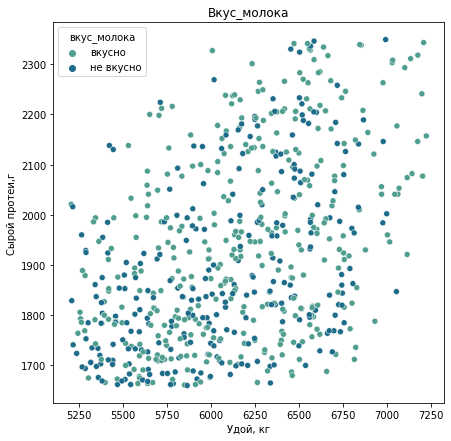

In [46]:
scatter(data = data_main,
        x='удой_кг',y='сырой_протеин',hue='вкус_молока', xlabel='Удой, кг', ylabel='Сырой протеи,г', title='Вкус_молока')

Теперь посмотрим на другие категоиальные признаки для удоя и сырого протеина.

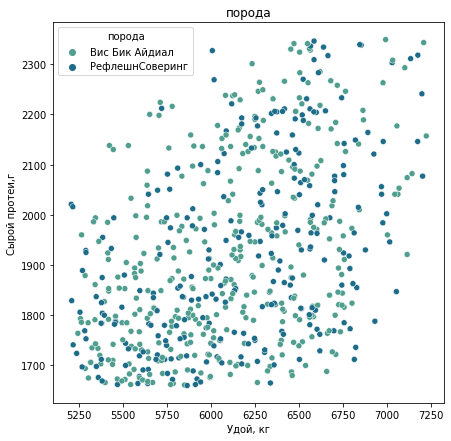

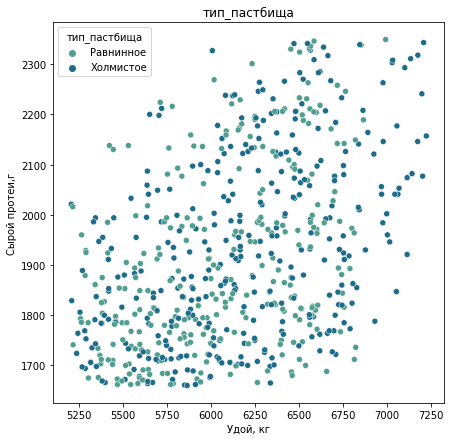

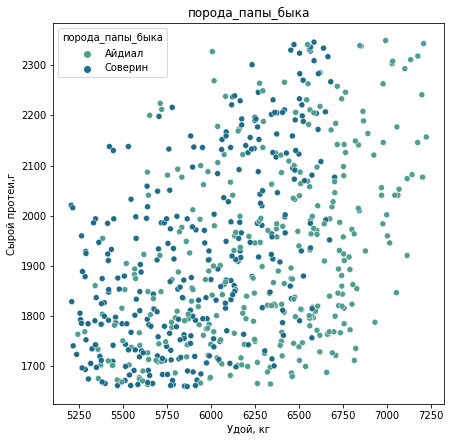

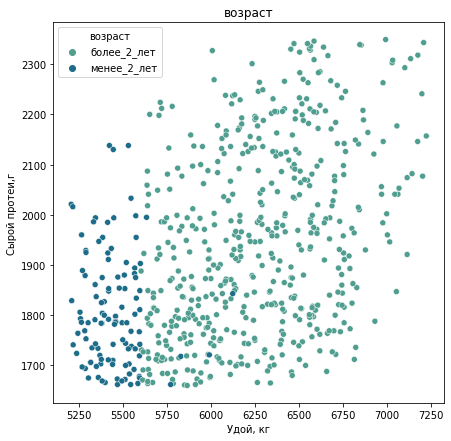

In [47]:
for i in categ_names:
    scatter(data = data_main,
        x='удой_кг',y='сырой_протеин',hue=i, xlabel='Удой, кг', ylabel='Сырой протеи,г', title=i)

- Обе породы рапределены равномерно
- Про больших объемах молока и протеина Холмистое пасбище встречается чаще.
- Порода папы быка так же влияет на удой. Более 6750 кг молока в год от породы айдиал.
- Как видим коровы  возрастом более 2 лет дают больше молока.

По графикам можно сделать вывод, чем болше коровы дают молока в год, тем больше протеина в корме.

#### Графики отоброные по Удою и ЭКЕ(Энергетическая кормовая единица)

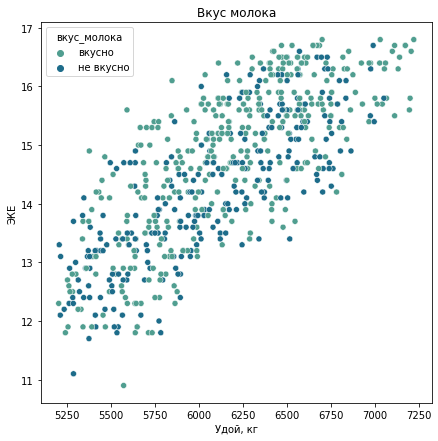

In [48]:
scatter(data = data_main,
        x='удой_кг',y='эке',hue='вкус_молока', xlabel='Удой, кг', ylabel='ЭКЕ', title='Вкус молока')

Можно сделать вывод, что чем больше Энергетическая кормовая единица тем более реже встреачется невкусное молоко.

Теперь посмотрим на другие категоиальные признаки для удоя и сырого протеина.

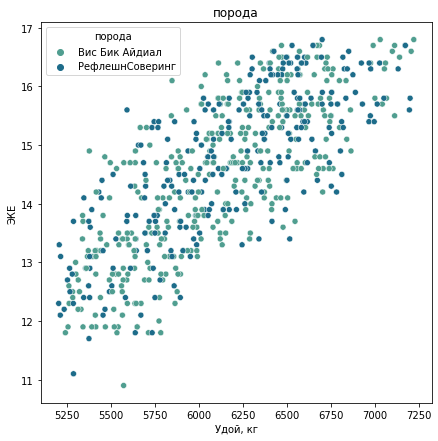

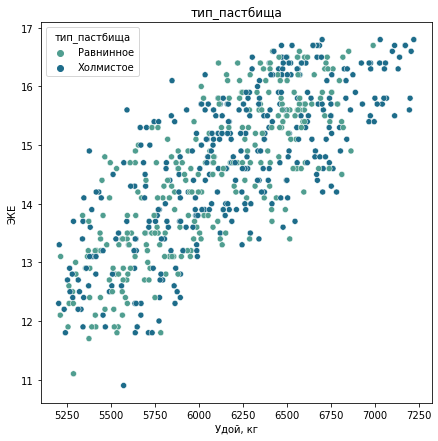

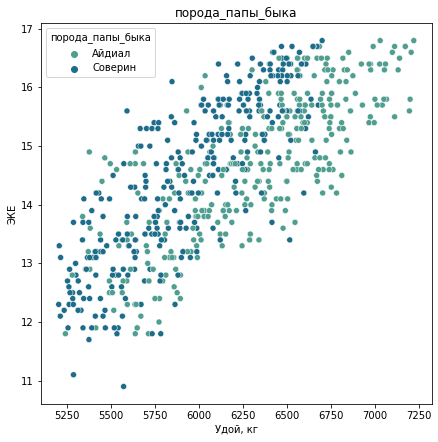

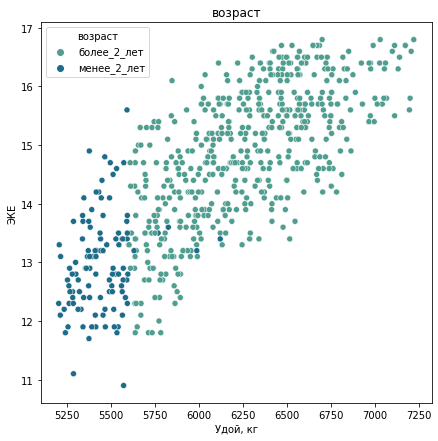

In [49]:
for i in categ_names:
    scatter(data = data_main,
        x='удой_кг',y='эке',hue=i, xlabel='Удой, кг', ylabel='ЭКЕ', title=i)

по графикам можно сделать вывод, чем выше эке тем больше молока приносят взрослые коровы, чей пап бык был породы Айдиал.

#### Графики отоброные по Удою и СПО((Сахаро-протеиновое соотношение))

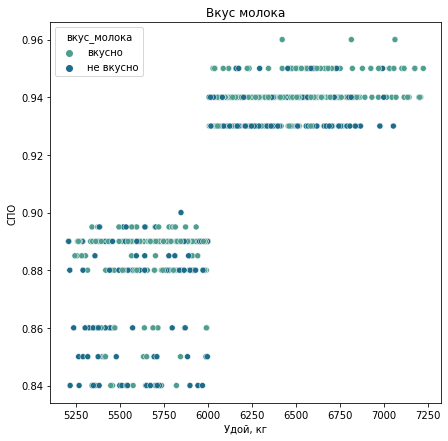

In [50]:
scatter(data = data_main,
        x='удой_кг',y='спо',hue='вкус_молока', xlabel='Удой, кг', ylabel='СПО', title='Вкус молока')

Вкус молока рапределен равномерно. Заметно, что признаки разделены на две группы

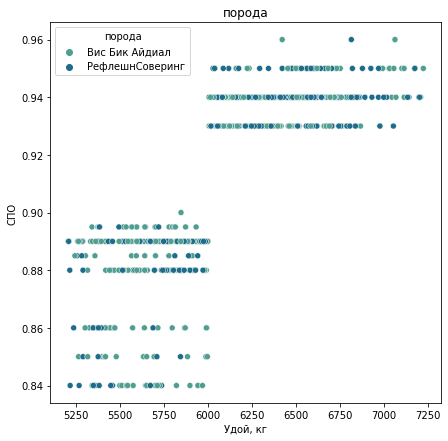

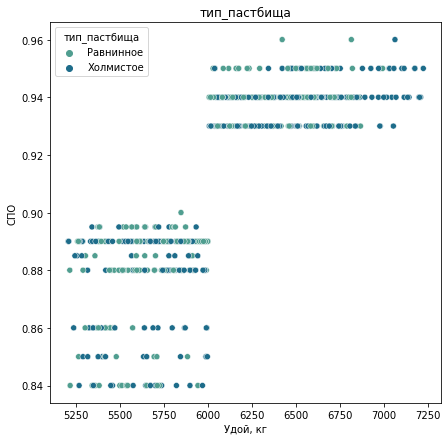

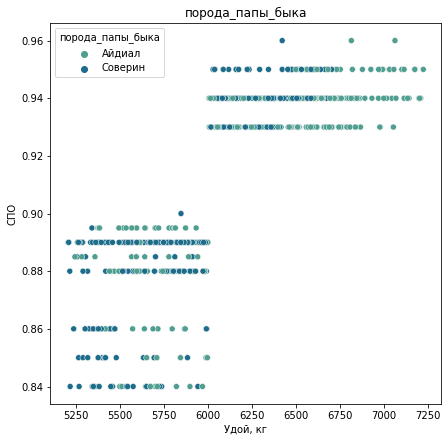

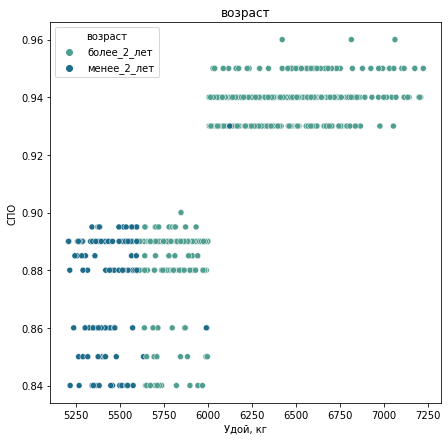

In [51]:
for i in categ_names:
    scatter(data = data_main,
        x='удой_кг',y='спо',hue=i, xlabel='Удой, кг', ylabel='СПО', title=i)

Чем больше Сахаро-протеиновое соотношение тем боле удой.

#### Графики отоброные по Удою и Жирность молока,%

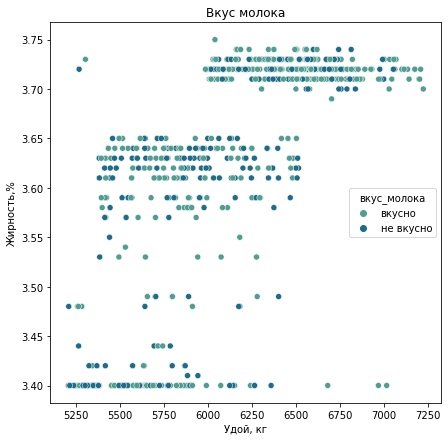

In [52]:
scatter(data = data_main,
        x='удой_кг',y='жирность_%',hue='вкус_молока', xlabel='Удой, кг', ylabel='Жирность,%', title='Вкус молока')

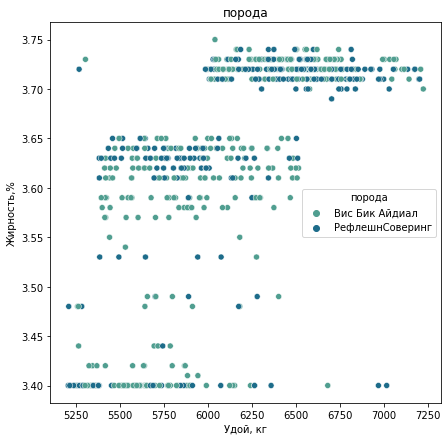

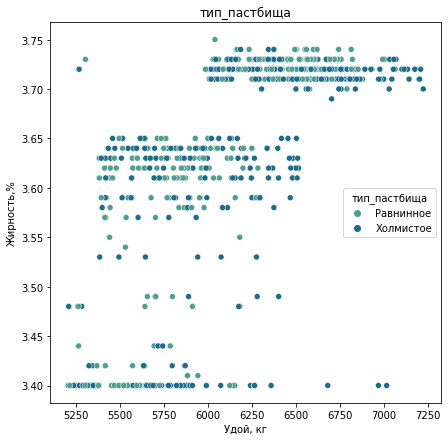

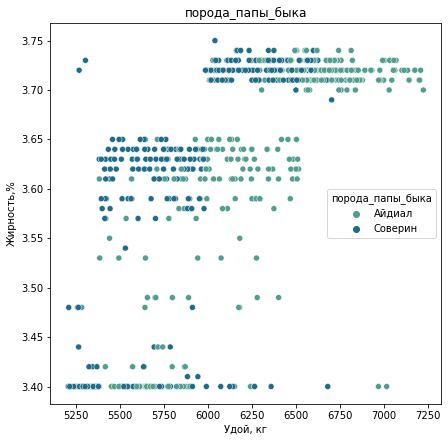

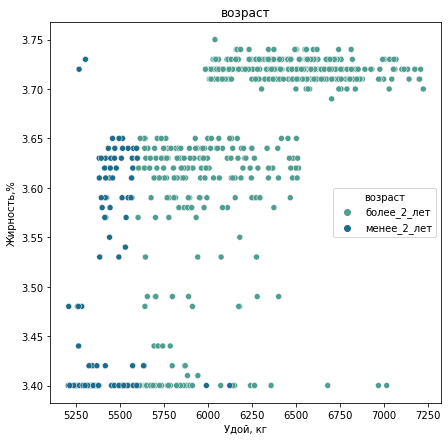

In [53]:
for i in categ_names:
    scatter(data = data_main,
        x='удой_кг',y='жирность_%',hue=i, xlabel='Удой, кг', ylabel='Жирность,%', title=i)

#### Графики отоброные по Удою и Уровню белка,%

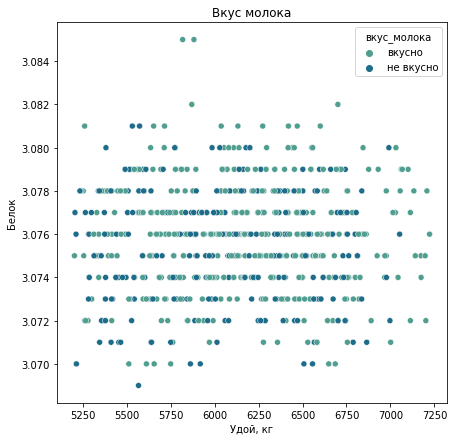

In [54]:
scatter(data = data_main,
        x='удой_кг',y='белок_%',hue='вкус_молока', xlabel='Удой, кг', ylabel='Белок', title='Вкус молока')

Вкусы рапределены равномерно

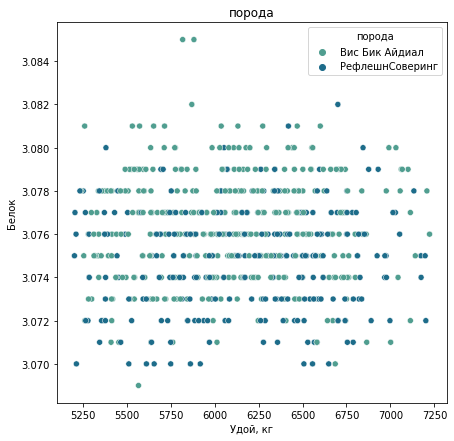

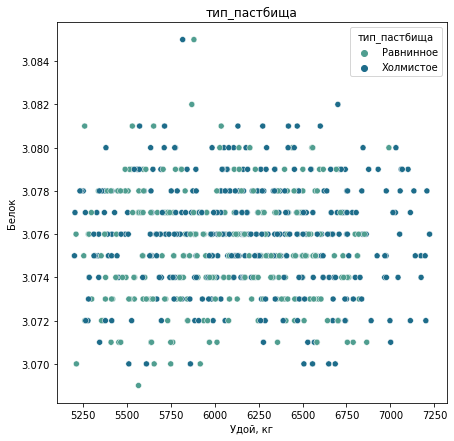

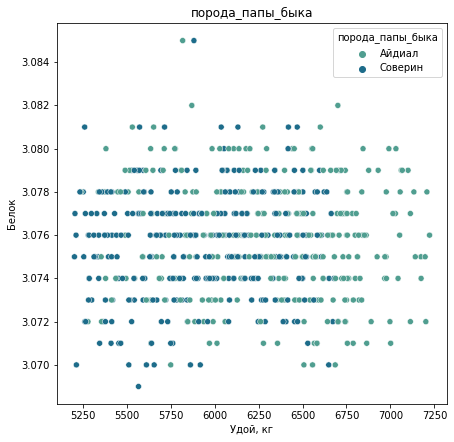

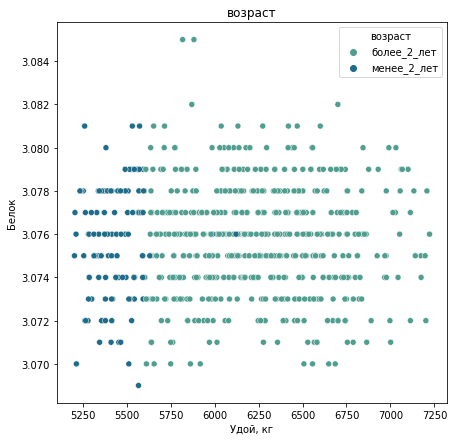

In [55]:
for i in categ_names:
    scatter(data = data_main,
        x='удой_кг',y='белок_%',hue=i, xlabel='Удой, кг', ylabel='Белок', title=i)

Все признаки распределены равномерно.

Добавим в данные поставщика недостающие признаки ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение). Средние значения каждого из признаков и увеличьте их на 5%.

#### Сделайте выводы о взаимосвязи признаков.

**Какой тип взаимосвязи между целевым и входными признаками?**

Линейные. и не линейные

**Есть ли нелинейные связи между целевым и входными признаками? Нужно ли вводить в модель дополнительные признаки, чтобы это учесть?**

Есть нелинейная связь между признаками СПО и Удой.

**Наблюдается ли мультиколлинеарность между входными признаками?**

о мультиколлинеарности говорят при значении коэффициента корреляции от 0.9 до 0.95 по модулю.

Мультиколлинеарность мы не наблюдаем

## Обучение модели линейной регрессии

###  Функции для регрессии

In [56]:
# Функция для кодирования маштобирования данных для обучения модели 
def prepare(X, y,categ_names,col_names):
    
    RANDOM_STATE = 42
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        random_state=RANDOM_STATE)
    # кодирум категориальные и маштабируем  количественные
    encoder = OneHotEncoder(drop='first', sparse=False)
    X_train_ohe = encoder.fit_transform(X_train[categ_names]) 
    X_test_ohe = encoder.transform(X_test[categ_names])
    encoder_col_names = encoder.get_feature_names()
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[col_names])
    X_test_scaled = scaler.transform(X_test[col_names])
    # создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
    # для данных OHE названия столбцов укажите из переменной encoder_col_names
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=col_names)

    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
    #обучение модели
    
    
    return X_train, X_test, y_train, y_test, encoder, scaler

In [57]:
# Функция для кодирования, маштобирования данных для которых будет применяться модель 
def prepare_rel(X,encoder, scaler):
   
    X_ohe = encoder.transform(X[categ_names])
    encoder_col_names = encoder.get_feature_names()

    
    X_scaled = scaler.transform(X[col_names])

    X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)
    X_scaled = pd.DataFrame(X_scaled, columns=col_names)

    X = pd.concat([X_ohe, X_scaled], axis=1)
    return X

In [58]:
# Графики для анализа остатков
def residual(y_test, predictions):
    residuals = y_test - predictions
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.scatterplot(ax=axes[0],data=residuals, x=predictions, y=residuals, palette="crest");
    axes[0].set_xlabel('Предсказания модели')
    axes[0].set_ylabel('Остатки')
    axes[0].set_title('Анализ дисперсии')


    sns.histplot(ax=axes[1],data=residuals, x=residuals, kde=True, palette="crest");
    axes[1].set_title('Гистограмма распределения остатков');
    axes[1].set_xlabel('Остатки')
    plt.xlabel('Остатки');


In [59]:
# Метрики для линейной модели
def metric(y_test,y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    return mae, mse,rmse

In [60]:
# Метрики для логической регресии
def metr(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    print('accuracy =', acc)
    print("recall =", recall)
    print('precision =', precision)

Подготовим данные для модели
целевой признак Удой_кг.
Удалим из дата сета такие входные  признаки как id коровы(как не влияет на показатель удоя), тип_пастбища( также не влияет на удой). Так же удалим признаки вкуса молока, жирности и белка молока. который также будет целевым в следующей модели.


#### Модель №1

In [61]:
# распределяем данные
#categ_names = ['порода_папы_быка','возраст'] # названия колонок с катенориальными данными
#col_names =['эке','сырой_протеин','спо','белок_%'] # Названия колонок с количесвенными данными
#X = data_main.drop(['порода','удой_кг','тип_пастбища','id','жирность_%','вкус_молока'], axis=1)
#y = data_main['удой_кг']
#X_train_1, X_test_1, y_train_1, y_test_1 = prepare(X, y,categ_names,col_names)

In [62]:
categ_names = ['тип_пастбища','порода','порода_папы_быка','возраст'] # названия колонок с катенориальными данными
col_names =['эке','сырой_протеин','спо','жирность_%','белок_%'] # Названия колонок с количесвенными данными
X = data_main.drop(['удой_кг','id','вкус_молока'], axis=1)
y = data_main['удой_кг']
X_train_1, X_test_1, y_train_1, y_test_1, encoder, scaler = prepare(X, y,categ_names,col_names)

In [63]:
  #обучение модели
model_lr_1  = LinearRegression()
model_lr_1.fit(X_train_1, y_train_1)

LinearRegression()

Найдем значение коэффициент детерминации r2

In [64]:
# предсказание модели и коэффициент детерминации r2
predictions_1 = model_lr_1.predict(X_test_1)
r2_1 = r2_score(y_test_1, predictions_1)
r2_1

0.7883534408760148

Анализ остатков

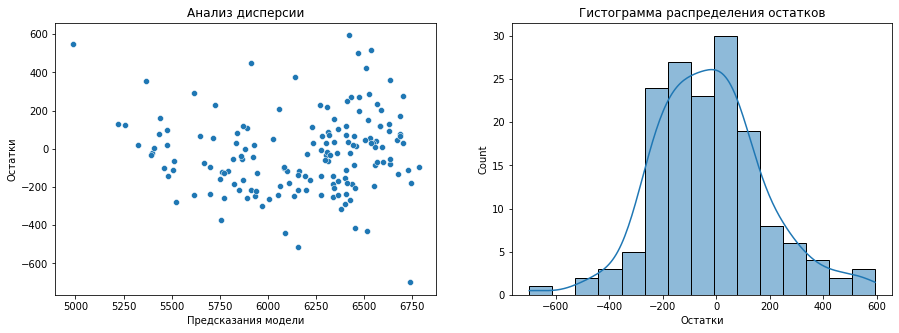

In [65]:
# расчет остатков
residual(y_test_1, predictions_1)

Значение коэффициент детерминации r2 = 0.786. Означает, что модель предсказывает верно в 78% случаях.

Анализ дисперсии выявил увеличение разброса ошибки при предсказании больших объёмах молока.

Нормальное распределение остатков само по себе не означает, что с моделью всё отлично. Так, если среднее значение смещено влево от нуля то модель часто даёт слишком большие предсказания, её прогнозы больше истинных значений. 

#### Модель №2

Исключим нелинейность, чтобы  признаки были информативны для линейной регрессии. ЭКЕ и Удой также связаны нелинейно. Нелинейность между ними можно исключить, если ввести новый признак ЭКЕ в квадрате.

In [66]:
# Преоброзуем признка спо в категориальный по границе 0,9
data_copy = data_main.copy()
data_main['спо_бин'] = data_main['спо']
data_main['спо_бин'] = data_main['спо_бин'].apply(lambda x:'<90' if x <=0.90 else '>90') 


In [67]:
data_main['эке^2'] = data_main['эке'] ** 2

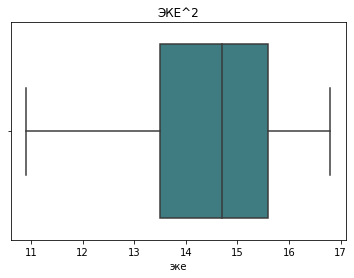

In [68]:
boxplot(data=data_main, x='эке', title='ЭКЕ^2');

Выбросов нет

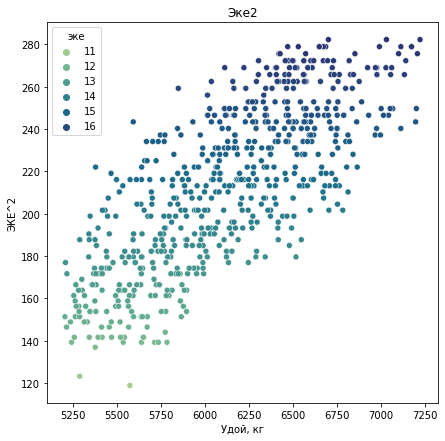

In [69]:
scatter(data = data_main,
        x='удой_кг',y='эке^2',hue='эке', xlabel='Удой, кг', ylabel='ЭКЕ^2', title='Эке2')

Видим зависимость удоя от эке.

In [70]:
# распределяем данные
categ_names = ['тип_пастбища','порода','спо_бин','порода_папы_быка','возраст'] # названия колонок с катенориальными данными
col_names =['эке','эке^2','белок_%','сырой_протеин','жирность_%'] # Названия колонок с количесвенными данными
X = data_main.drop(['id','спо','удой_кг','вкус_молока'], axis=1)
y = data_main['удой_кг']
X_train_2, X_test_2, y_train_2, y_test_2,encoder, scaler = prepare(X, y,categ_names,col_names)

In [71]:
  #обучение модели
model_lr_2  = LinearRegression()
model_lr_2.fit(X_train_2, y_train_2)

LinearRegression()

Найдем значение коэффициент детерминации r2

In [72]:
predictions_2 = model_lr_2.predict(X_test_2)
r2_2 = r2_score(y_test_2, predictions_2)
r2_2

0.8124627961809471

Модель верно оценивает в 82,3% случаях

Анализ остатков

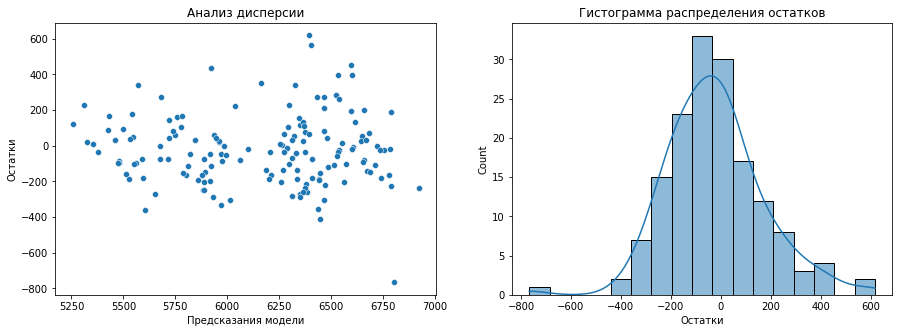

In [73]:
residual(y_test_2, predictions_2)

Большая и маленькая дисперсии остатков чередуются на графике.

Нормальное распределение остатков. Среднее значение смещено влево от нуля. Модель часто даёт слишком большие предсказания, её прогнозы больше истинных значений. 

#### Модель №3

Добавим признак Имя Папы из файла data_dad, соединив его с остальными данными data_main по ключу.

In [74]:
data_main = data_main.merge(data_dad)

In [75]:
data_main.head()

,id,удой_кг,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст,спо_бин,эке^2,имя_папы
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,<90,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,<90,163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,<90,196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,<90,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,<90,163.84,Барин


In [76]:
# распределяем данные
categ_names = ['спо_бин','возраст','тип_пастбища','порода','имя_папы','порода_папы_быка'] # названия колонок с катенориальными данными
col_names =['эке','эке^2','белок_%','сырой_протеин','жирность_%'] # Названия колонок с количесвенными данными
X = data_main.drop(['id','спо','удой_кг','вкус_молока'], axis=1)
y = data_main['удой_кг']
X_train_3, X_test_3, y_train_3, y_test_3,encoder, scaler = prepare(X, y,categ_names,col_names)

In [77]:
  #обучение модели
model_lr_3  = LinearRegression()
model_lr_3.fit(X_train_3, y_train_3)

LinearRegression()

In [78]:
predictions_3 = model_lr_3.predict(X_test_3)
r2_3 = r2_score(y_test_3, predictions_3)
r2_3

0.822981547835865

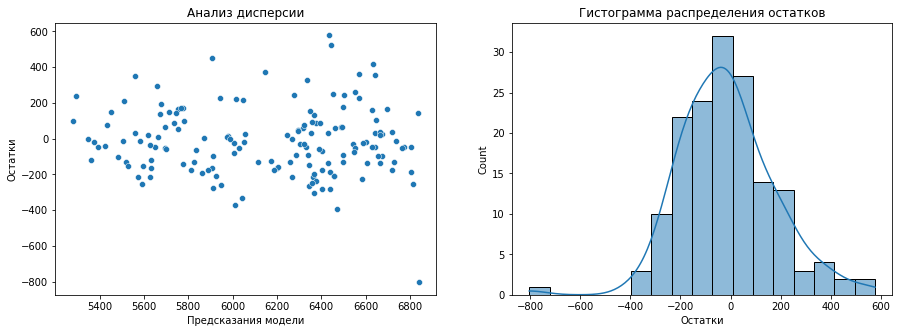

In [79]:
residual(y_test_3, predictions_3)

Большая и маленькая дисперсии остатков чередуются на графике.

Нормальное распределение остатков. Среднее значение смещено влево от нуля. Модель часто даёт слишком большие предсказания, её прогнозы больше истинных значений. 

#### Метрики и выбор лучшей модели

In [80]:
#остатки
residuals_1 = y_test_1 - predictions_1
residuals_2 = y_test_2 - predictions_2
residuals_3 = y_test_3 - predictions_3

In [81]:
# сравним сумму остатков модели
print('сумма остатков первой модели:',residuals_1.sum())
print('сумма остатков второй модели:',residuals_2.sum())
print('сумма остатков третей модели:',residuals_3.sum())

сумма остатков первой модели: -3878.9994348895734
сумма остатков второй модели: -3642.8405942610543
сумма остатков третей модели: -2421.628946979393


In [82]:
# метрика R2
print('Модель №1 r2=',r2_1)
print('Модель №2 r2=',r2_2)
'Модель №3 r2=',r2_3

Модель №1 r2= 0.7883534408760148
Модель №2 r2= 0.8124627961809471


('Модель №3 r2=', 0.822981547835865)

По R2  лучше модель №3 которая предсказывает с вероятностью 82,5%


Метрики моделей

In [83]:
mae1,mse1,rmse1 = metric(y_test_1,predictions_1)
mae2,mse2,rmse2 = metric(y_test_2,predictions_2)
mae3,mse3,rmse3 = metric(y_test_3,predictions_3)

In [84]:
print(mae1,mse1,rmse1)

160.9296005991645 43083.82429496037 207.5664334495353


Метрика МАЕ показывает, что в среднем первая модель отклоняется от истинного значения целевого признака примерно на 161 кг.

RMSE показывает, что модель в среднем ошибается на 208 кг.

In [85]:
print(mae2,mse2,rmse2)

149.24889185492006 38176.0042381553 195.3868067146687


Метрика МАЕ показывает, что в среднем вторая модель отклоняется от истинного значения целевого признака примерно на 149 кг.

RMSE показывает, что модель в среднем ошибается на 194 кг.


In [86]:
print(mae3,mse3,rmse3)

145.47556197447383 36034.754930920775 189.8282248005306


Метрика МАЕ показывает, что в среднем вторая модель отклоняется от истинного значения целевого признака примерно на 145 кг.

RMSE показывает, что модель в среднем ошибается на 188.


Доверительный интервал

In [87]:
a=1.0 * np.array(predictions_3)
st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))

(6090.576697082632, 6223.584181222837)

доверительный интервал прогноза  от 6094, до 6226 кг

#### Прогноз наданных на данных поставщика

In [88]:
data_main.groupby('возраст')['спо'].mean()

возраст
более_2_лет    0.921274
менее_2_лет    0.874545
Name: спо, dtype: float64

In [89]:
pivot = data_main.pivot_table(index='возраст', values=['эке', 'спо','сырой_протеин'], aggfunc ='mean')  
dfp =pivot.reset_index()

In [90]:
data_cb = data_cb.merge(dfp, on='возраст')

In [91]:
for i in ['эке', 'спо','сырой_протеин']:
    data_cb[i] = data_cb[i] * 1.05

In [92]:
data_cb['спо_бин'] = data_cb['спо'].apply(lambda x:'<90' if x <=0.93 else '>90') 
data_cb['эке^2'] = data_cb['эке'] ** 2

In [93]:
data_cb.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_белок_%,возраст,спо,сырой_протеин,эке,спо_бин,эке^2
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.967338,2045.523649,15.625541,>90,244.157517
1,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,0.967338,2045.523649,15.625541,>90,244.157517
2,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,0.967338,2045.523649,15.625541,>90,244.157517
3,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,0.967338,2045.523649,15.625541,>90,244.157517
4,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,0.967338,2045.523649,15.625541,>90,244.157517


In [94]:
#распределяем данные

categ_names = ['спо_бин','возраст','тип_пастбища','порода','имя_папы','порода_папы_быка'] # названия колонок с катенориальными данными
col_names =['эке','эке^2','текущий_белок_%','сырой_протеин','текущая_жирность_%'] # Названия колонок с количесвенными данными
X = data_cb.drop(['спо'], axis=1)
## применим функция для кодирования и маштабирования
X = prepare_rel(X,encoder, scaler)

In [95]:
#распределяем данные

categ_names = ['спо_бин','возраст','тип_пастбища','порода','имя_папы','порода_папы_быка'] # названия колонок с катенориальными данными
col_names =['эке','эке^2','текущий_белок_%','сырой_протеин','текущая_жирность_%'] # Названия колонок с количесвенными данными
X = data_cb.drop(['спо'], axis=1)
## применим функция для кодирования и маштабирования
X = prepare_rel(X,encoder, scaler)

In [96]:
# Получим прогноз удоя , добавим его в таблицу и округлим до целого числа.
Final_pred = model_lr_3.predict(X)
data_cb.insert(0,'удой_кг', Final_pred) 
data_cb['удой_кг'] = data_cb['удой_кг'].astype(int)

In [97]:
data_cb.loc[data_cb['удой_кг'] > 6000]

,удой_кг,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_белок_%,возраст,спо,сырой_протеин,эке,спо_бин,эке^2
0,6583,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.967338,2045.523649,15.625541,>90,244.157517
1,6251,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,0.967338,2045.523649,15.625541,>90,244.157517
2,6620,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,0.967338,2045.523649,15.625541,>90,244.157517
3,6560,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,0.967338,2045.523649,15.625541,>90,244.157517
4,6483,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,0.967338,2045.523649,15.625541,>90,244.157517
5,6630,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,0.967338,2045.523649,15.625541,>90,244.157517
6,6638,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,0.967338,2045.523649,15.625541,>90,244.157517
7,6967,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.68,3.046,более_2_лет,0.967338,2045.523649,15.625541,>90,244.157517
8,6577,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет,0.967338,2045.523649,15.625541,>90,244.157517
9,6372,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,0.967338,2045.523649,15.625541,>90,244.157517


**Вывод:**
- Изучили три модели линейной регрессии.
- Просмотрели все метрики все моделей. Выбрали лучшую.
- Получили прогноз по удою на данных поставщика
Модель предказала удой выше 6 тонн/год у 11 коров. 

## Обучение модели логистической регрессии

### Подготовка данных и обучение модели

In [98]:
cf = data_main.phik_matrix() 
cf.style.background_gradient(cmap='Blues')

interval columns not set, guessing: ['id', 'удой_кг', 'эке', 'сырой_протеин', 'спо', 'жирность_%', 'белок_%', 'эке^2']


,id,удой_кг,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст,спо_бин,эке^2,имя_папы
id,1.000000,0.000000,0.000000,0.108271,0.382303,0.611843,0.037776,0.320977,0.629816,0.000000,0.039659,0.000000,0.000000,0.000000,0.000000
удой_кг,0.000000,1.000000,0.719239,0.465118,0.661615,0.161643,0.279645,0.518114,0.725682,0.063045,0.178281,0.998071,0.999947,0.721136,0.432018
эке,0.000000,0.719239,1.000000,0.458283,0.591190,0.123086,0.106758,0.171355,0.711256,0.000000,0.272265,0.771596,0.900428,0.979902,0.069197
сырой_протеин,0.108271,0.465118,0.458283,1.000000,0.386550,0.090971,0.097165,0.000000,0.428083,0.202386,0.173817,0.353829,0.534994,0.453448,0.119768
спо,0.382303,0.661615,0.591190,0.386550,1.000000,0.062660,0.155349,0.425601,0.577572,0.073787,0.572702,0.744410,1.000000,0.584376,0.409142
порода,0.611843,0.161643,0.123086,0.090971,0.062660,1.000000,0.213218,0.089330,0.289409,0.361851,0.000000,0.057295,0.028933,0.074709,0.382644
тип_пастбища,0.037776,0.279645,0.106758,0.097165,0.155349,0.213218,1.000000,0.000000,0.175457,0.099908,0.269063,0.128455,0.143022,0.148222,0.233149
порода_папы_быка,0.320977,0.518114,0.171355,0.000000,0.425601,0.089330,0.000000,1.000000,0.167630,0.134582,0.000000,0.355817,0.407797,0.152239,0.982909
жирность_%,0.629816,0.725682,0.711256,0.428083,0.577572,0.289409,0.175457,0.167630,1.000000,0.236164,0.158132,0.684613,0.923153,0.705105,0.088401
белок_%,0.000000,0.063045,0.000000,0.202386,0.073787,0.361851,0.099908,0.134582,0.236164,1.000000,0.143857,0.000000,0.000000,0.000000,0.091102


In [99]:
# закодируем целевой признак 1- вкусное, 0 - не вкусное.
data_main['вкус_молока'] = data_main['вкус_молока'].apply(lambda x: 1 if x =='вкусно' else 0)

In [100]:
#data_main['жирность_%'] = data_main['жирность_%'].apply(lambda x: '<3.7' if x <=3.7 else '>3.7')
#data_main['белок_%'] = data_main['белок_%'].apply(lambda x: '<3.07' if x <=3.076 else '>3.07')

In [101]:
# распределяем данные и пропустим через функцию кодировки и маштабирования
#categ_names = ['спо_бин','имя_папы','тип_пастбища','возраст','порода','порода_папы_быка'] # названия колонок с катенориальными данными
#col_names =['эке','удой_кг','сырой_протеин','белок_%','жирность_%'] # Названия колонок с количесвенными данными
#X = data_main.drop(['эке^2','спо','id','вкус_молока'], axis=1)
#y = data_main['вкус_молока']
#X_train, X_test, y_train, y_test, encoder, scaler = prepare(X, y,categ_names,col_names)

In [102]:
for i in ['эке', 'спо','сырой_протеин']:
    data_cb[i] = data_main[i].mean() * 1.05

In [103]:
categ_names = ['имя_папы','тип_пастбища','возраст','порода','порода_папы_быка'] # названия колонок с катенориальными данными
col_names =['спо','эке','удой_кг','сырой_протеин','белок_%','жирность_%'] # Названия колонок с количесвенными данными
X = data_main.drop(['эке^2','спо_бин','id','вкус_молока'], axis=1)
y = data_main['вкус_молока']
X_train, X_test, y_train, y_test, encoder, scaler = prepare(X, y,categ_names,col_names)

In [104]:
# создаём объект для работы с моделью
clf = LogisticRegression()
# обучаем модель на данных
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#### Постройте матрицу ошибок.

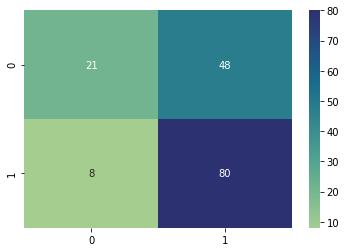

In [105]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap='crest');

 0 - не вкусно, 1-вкусно

Матрица показывает, что модель ошибается при определении "не вкусного" молока 46 раз.
При определении " Вкусного"  ошибается 15 раз.

#### Метрики accuracy, recall, precision

In [106]:
metr(y_test, y_pred)

accuracy = 0.643312101910828
recall = 0.9090909090909091
precision = 0.625


 Метрика, которая показывает, насколько часто модель правильно классифицирует данные.
 т.е. модель угадывает в 61% случаях

Recall измеряет, смогла ли модель классификации присвоить класс 1 всем объектам этого класса. Оценивает оценки второго рода
Считает те ошибки когда вкусное молоко, названо не вкусным


Precision оценивает точность, с которой модель присваивает объектам класс 1. Она реагирует на ошибки первого рода, однако не реагирует на ошибки второго. Метрика считает когда не вкусное молоко названо вкусным

#### Проанализируйте модель логистической регрессии.

Для нас самая важная метрика `precision` т.к. фермеру важно получать именно Вкусное молоко, то на важна `ошибка первого рода`. Если мы опустим ошибку до нуля модель не будет предсказывать `не вкусное` молоко как `вкусно`. Опять же не страшно если ошибка второго рода станет больше(т.е. `вкусное` молоко будет определяться `не вкусным`)

In [107]:
def th(th, y_test):
    thresholds = [round(i,2) for i in np.linspace(th,1,num = 100,endpoint=False)]
    c=[]
    for i in thresholds:
        y_pred_new = (clf.predict_proba(X_test)[:, 1] >= i).astype(int)    
        cm = confusion_matrix(y_test, y_pred_new)
        if cm[0][1] ==0:
            c.append(i)
        if len(c) >0:
            break;
    sns.heatmap(cm, annot=True, fmt='d',cmap='crest');        
    return 'Порог значения =', c        

('Порог значения =', [0.82])

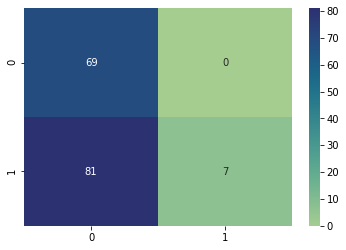

In [108]:
th(0.5, y_test)

Итак, мы определили минимальный порог при котором Ложно положительное значение рано нулю. 

Изменим порог

In [109]:
#Зададим новый порог
thresholds = 0.82
# Получим новые предсказания с новым порогом
y_pred_new = (clf.predict_proba(X_test)[:, 1] >= thresholds).astype(int)

Ошибка первого рода снизилась до нуля. Ошибка второга рода увеличилось до 80.

In [110]:
#Посмотрим метрики
metr(y_test, y_pred_new)

accuracy = 0.4840764331210191
recall = 0.07954545454545454
precision = 1.0


precision увеличелся до 1, качество модели столо 54,7%

**Выводы**
- Обработали данные
- Закодировали целевой признак "Вкус молока", 1-вкусное, 0-не вкусное
- Отобрали данные для выборок и обучили модель
-  первоначально модель предсказывает верно  в 61%случаях с порогом в 0,5.
- Нашли новое значение порога - 0,77.
- с этим порогом precision стал равняться единице.
- качество предсказания упало до 54%.


 ##### Скажите, что нужно сделать дальше, исходя из анализа модели?

Дальше следует либо применить модель на "практике", либо продолжить работу с данными для увеличения эффективности работы модели.

### Прогнозирование вкуса молока коров, которых фермер хочет купить.

In [113]:
categ_names = ['имя_папы','тип_пастбища','возраст','порода','порода_папы_быка'] # названия колонок с катенориальными данными
col_names =['спо','эке','удой_кг','сырой_протеин','текущий_белок_%','текущая_жирность_%'] # Названия колонок с количесвенными данными
X = data_cb.drop(['эке^2','спо_бин'], axis=1)
X = prepare_rel(X,encoder, scaler)

In [116]:
data_cb.insert(1,'вкус_молока', fin_pred) 

In [117]:
# закодируем целевой признак 1- вкусное, 0 - не вкусное.
data_cb['вкус_молока'] = data_cb['вкус_молока'].apply(lambda x:'вкусно' if x ==1 else 'не вкусно')

In [118]:
data_cb.head()

,удой_кг,вкус_молока,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_белок_%,возраст,спо,сырой_протеин,эке,спо_бин,эке^2
0,6583,не вкусно,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.958744,2019.947532,15.276162,>90,244.157517
1,6251,не вкусно,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,0.958744,2019.947532,15.276162,>90,244.157517
2,6620,не вкусно,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,0.958744,2019.947532,15.276162,>90,244.157517
3,6560,не вкусно,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,0.958744,2019.947532,15.276162,>90,244.157517
4,6483,не вкусно,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,0.958744,2019.947532,15.276162,>90,244.157517


Применили модель логической регрессии на данных поставщика коров. с порогом 0,74.

## Итоговые выводы

Отберем коров для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко.

In [119]:
data_cb.loc[(data_cb['вкус_молока']=='вкусно') & (data_cb['удой_кг'] >=6000) ]

,удой_кг,вкус_молока,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_белок_%,возраст,спо,сырой_протеин,эке,спо_бин,эке^2


С подобными требованиями  фермер не сможет выбрать корову.  

In [120]:
## Результат при  пороге 0,70(FP=3, Precision=0.88)
thresholds = 0.77

fin_pred =  (clf.predict_proba(X)[:, 1] >= thresholds).astype(int)
data_cb = data_cb.drop(['вкус_молока'], axis=1)
data_cb.insert(1,'вкус_молока', fin_pred)

data_cb['вкус_молока'] = data_cb['вкус_молока'].apply(lambda x:'вкусно' if x ==1 else 'не вкусно')
data_cb.loc[(data_cb['вкус_молока']=='вкусно') & (data_cb['удой_кг'] >=6000) ]

,удой_кг,вкус_молока,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_белок_%,возраст,спо,сырой_протеин,эке,спо_бин,эке^2
0,6583,вкусно,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.958744,2019.947532,15.276162,>90,244.157517
9,6372,вкусно,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,0.958744,2019.947532,15.276162,>90,244.157517


##### Какие способы улучшения качества регрессионной модели вы использовали в этой задаче?

Для улучшения линейной модели: 
- убрали нелинейность некоторых признаков. Путем добавления нового признака на основе старых, или изменения с типа признака с количественного на категориальный.
- Добавили признаки из другого дата фрейма.
Для улучшения логической модели:
- мы изменили тип признаков
- изменили порог модели.


##### Возможно ли ещё улучшить результаты регрессионной модели? Если можно, то как? Если нет, то почему?

Возможно можно улучшить качество модели, если добавить новые или изменить старые признаки.
Может изменить еще раз изменить тип некоторых признаков.

##### Какие метрики моделей классификации, в том числе логистической регрессии, важны при анализе рисков или экономических расчётов?

Для линейной регрессии важны метрики:
- R2 -коэффициент детерминации - показывает с каким шансом модель верно предсказывает
- Метрика МАЕ показывает на сколько в среднем  модель отклоняется от истинного значения целевого признака
- RMSE показывает, на сколько модель ошибается в среднем

Для логической регрессии важны таки метрики:
- accuracy Метрика, которая показывает, насколько часто модель правильно классифицирует данные. Т.е. показывает с каким шансом модель верно предсказывает.
- recall измеряет, смогла ли модель классификации присвоить класс 1 всем объектам этого класса. Оценивает оценки второго рода.
- Precision оценивает точность, с которой модель присваивает объектам класс 1. Она реагирует на ошибки первого рода, однако не реагирует на ошибки второго.

 